In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


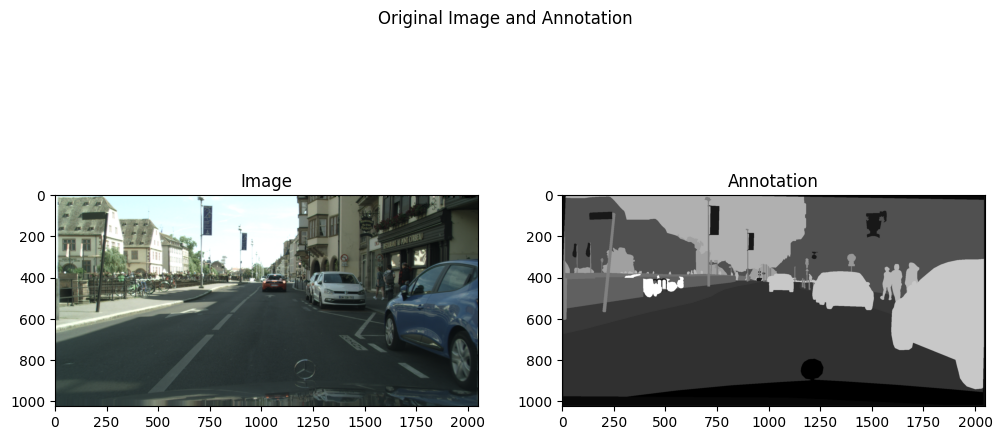

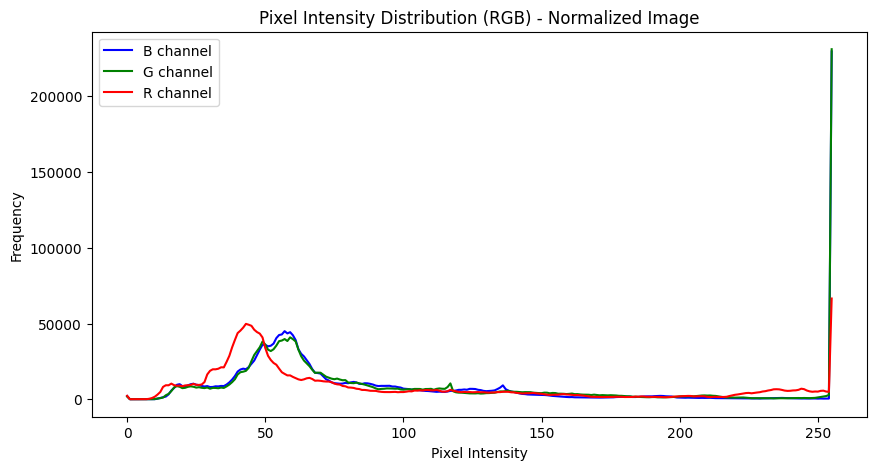

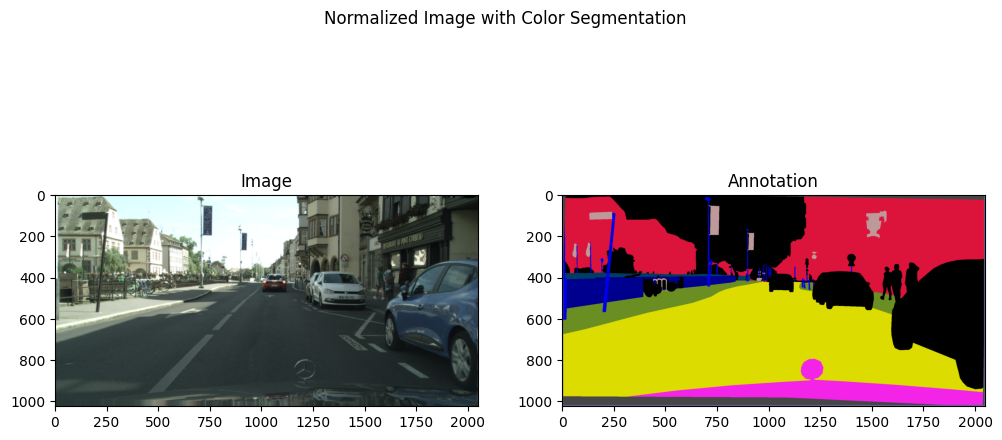

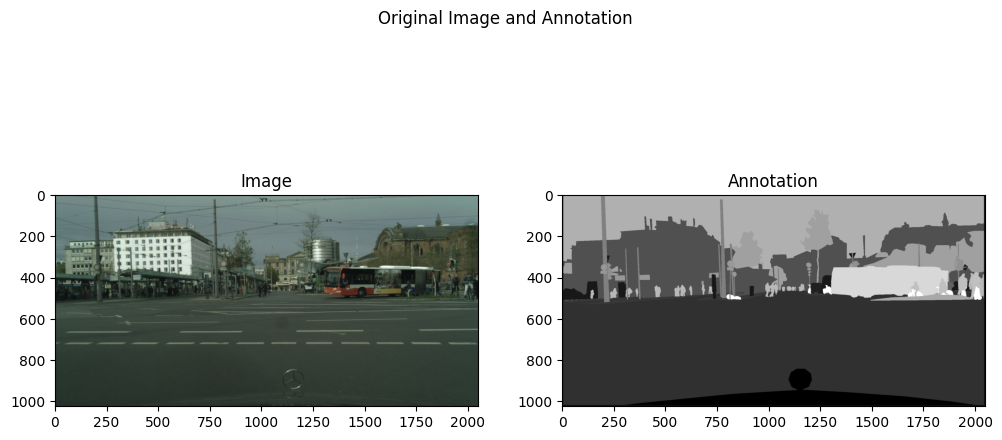

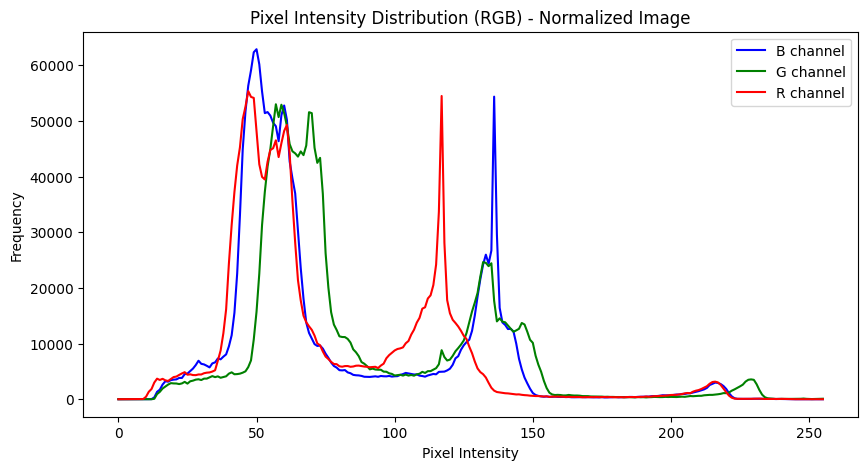

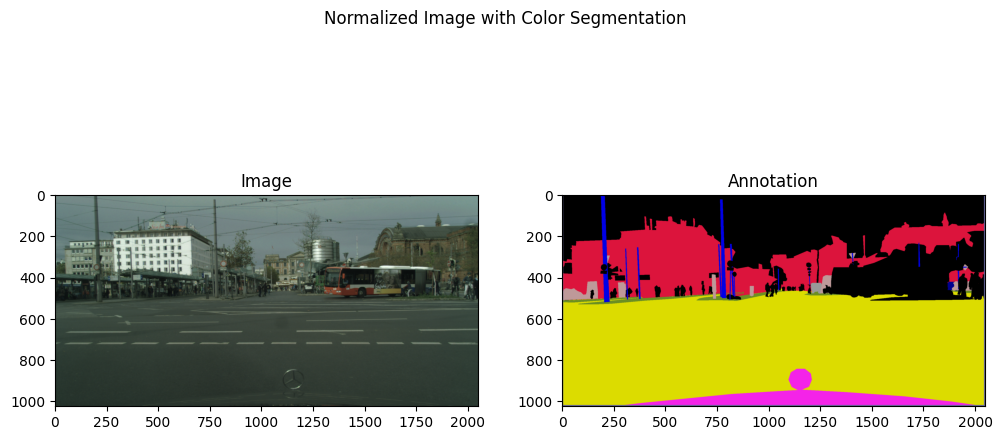

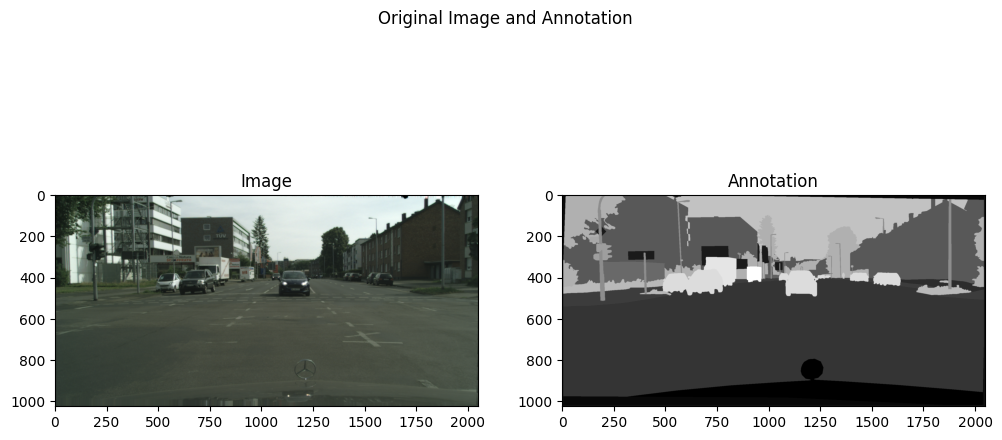

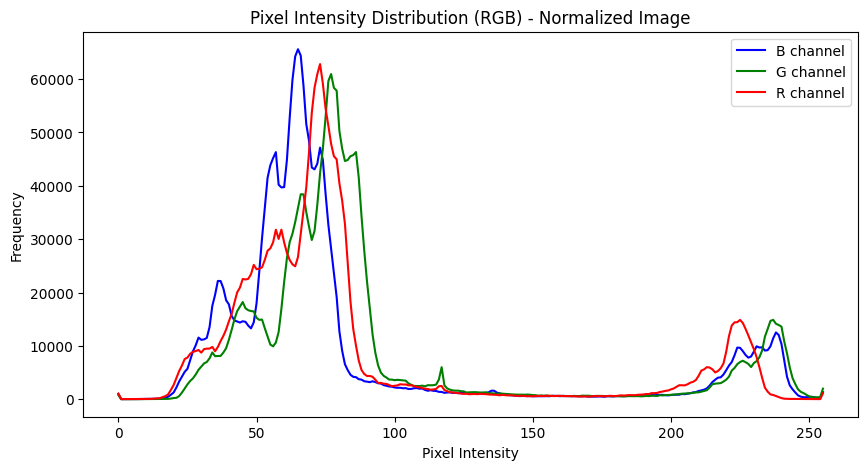

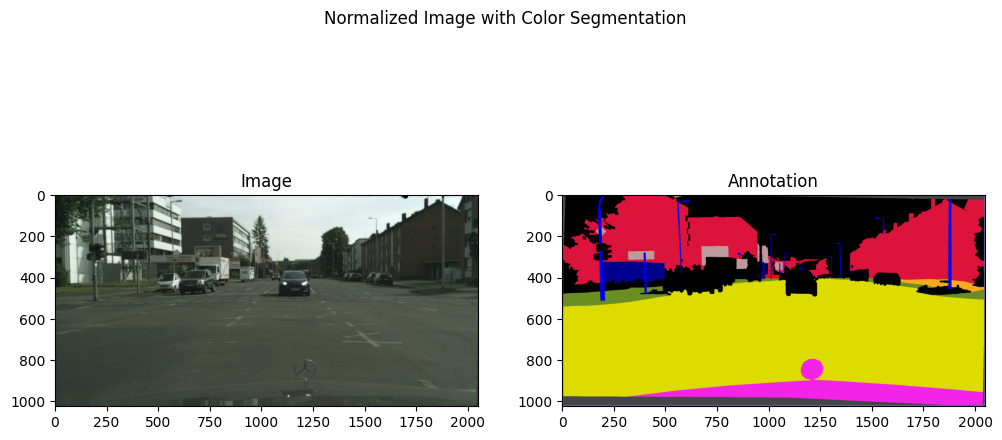

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


IMAGE_DATASET_PATH = '/content/drive/MyDrive/leftImg8bit/train'
#ANNOTATION_PATH = '/content/drive/MyDrive/gtFine/train'

def load_image_and_annotation(image_path, annotation_path):
    image = cv2.imread(image_path)  # Load image
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)  # Load annotation (grayscale)
    if image is None or annotation is None:
        raise ValueError(f"Could not load image or annotation: {image_path}, {annotation_path}")
    return image, annotation

# Normalize pixel values (0-1 range)
def normalize_image(image):
    return image / 255.0

# Function to visualize image and its annotation
def visualize_image_and_annotation(image, annotation, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image')

    ax[1].imshow(annotation, cmap='gray')
    ax[1].set_title('Annotation')

    if title:
        fig.suptitle(title)
    plt.show()

# Function to plot pixel intensity distribution (RGB channels)
def plot_pixel_intensity(image, title=None):
    plt.figure(figsize=(10, 5))

    # Normalizing
    image_uint8 = (image * 255).astype(np.uint8)

    # Split the channels and plot histograms for R, G, B channels
    channels = ['b', 'g', 'r']
    colors = ['blue', 'green', 'red']

    for i, color in enumerate(channels):
        hist = cv2.calcHist([image_uint8], [i], None, [256], [0, 256])
        plt.plot(hist, color=colors[i], label=f'{color.upper()} channel')

    plt.title(f"Pixel Intensity Distribution (RGB) - {title}" if title else "Pixel Intensity Distribution (RGB)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Function to get random samples from the dataset
def get_sample_paths(image_dataset_path, annotation_dataset_path, num_samples=3):
    city_folders = [os.path.join(image_dataset_path, city) for city in os.listdir(image_dataset_path)]
    image_paths = []
    annotation_paths = []

    for city in city_folders:
        img_folder = city  # Image folder
        annot_folder = os.path.join(annotation_dataset_path, os.path.basename(city))  # Annotations folder

        images = sorted([f for f in os.listdir(img_folder) if f.endswith('_leftImg8bit.png')])
        annotations = sorted([f for f in os.listdir(annot_folder) if f.endswith('_gtFine_labelIds.png')])

        for img, annot in zip(images, annotations):
            image_paths.append(os.path.join(img_folder, img))
            annotation_paths.append(os.path.join(annot_folder, annot))

    # Randomly select sample images and annotations
    sample_indices = random.sample(range(len(image_paths)), num_samples)
    sampled_image_paths = [image_paths[i] for i in sample_indices]
    sampled_annotation_paths = [annotation_paths[i] for i in sample_indices]

    return sampled_image_paths, sampled_annotation_paths

# Function to create a colormap for segmentation
def create_cityscapes_label_colormap():
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]    # Road
    colormap[1] = [244, 35, 232]    # Sidewalk
    colormap[2] = [70, 70, 70]      # Building
    colormap[3] = [102, 102, 156]   # Wall
    colormap[4] = [190, 153, 153]   # Fence
    colormap[5] = [153, 153, 153]   # Pole
    colormap[6] = [250, 170, 30]    # Traffic light
    colormap[7] = [220, 220, 0]     # Traffic sign
    colormap[8] = [107, 142, 35]    # Vegetation
    colormap[9] = [152, 251, 152]   # Terrain
    colormap[10] = [70, 130, 180]   # Sky
    colormap[11] = [220, 20, 60]    # Person
    colormap[12] = [255, 0, 0]      # Rider
    colormap[13] = [0, 0, 142]      # Car
    colormap[14] = [0, 0, 70]       # Truck
    colormap[15] = [0, 60, 100]     # Bus
    colormap[16] = [0, 80, 100]     # Train
    colormap[17] = [0, 0, 230]      # Motorcycle
    colormap[18] = [119, 11, 32]    # Bicycle
    return colormap

# Function to map label to corresponding color
def label_to_color_image(label):
    colormap = create_cityscapes_label_colormap()
    color_image = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
    for label_id, color in enumerate(colormap):
        color_image[label == label_id] = color
    return color_image

# Main processing for sampled data
sampled_image_paths, sampled_annotation_paths = get_sample_paths(IMAGE_DATASET_PATH, ANNOTATION_PATH, num_samples=3)

# Iterate through samples and process them
for image_path, annotation_path in zip(sampled_image_paths, sampled_annotation_paths):
    image, annotation = load_image_and_annotation(image_path, annotation_path)


    normalized_image = normalize_image(image)


    visualize_image_and_annotation(image, annotation, title='Original Image and Annotation')


    plot_pixel_intensity(normalized_image, title='Normalized Image')


    color_annotation = label_to_color_image(annotation)


    image_uint8 = (normalized_image * 255).astype(np.uint8)


    visualize_image_and_annotation(image_uint8, color_annotation, title='Normalized Image with Color Segmentation')
